# Phenotypic Conservation in CPPN Crossover

Here the crossover of random CPPN is inspected. Ideally, the child of crossover should share some phenotypic traits from each parent. The suspicion is that CPPN change dramatically during crossover.

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from neat import genome, config, indexer, nn
from src import cppn

In [175]:
indx = indexer.InnovationIndexer(0)
conf = config.Config('config.txt')

In [197]:
def express_cppn(genome, w, h):
    net = nn.create_feed_forward_phenotype(genome)
    grid = np.zeros((w, h))
    for x in range(w):
        for y in range(h):
            _x = -1.0 + 2.0 * x / (w - 1) # Map x, y to [-1, 1]
            _y = -1.0 + 2.0 * y / (h - 1)
            out = net.serial_activate([_x, _y])
            grid[x, y] = out[0]
    return grid

def three_image_plot(imga, imgb, imgc):
    f, axes = plt.subplots(1, 3)
    for a in axes:
        a.set_xticks([])
        a.set_yticks([])
    axes[0].set_title('Parent A')
    axes[1].set_title('Parent B')
    axes[2].set_title('Child')
    axes[0].imshow(imga, cmap='gray', interpolation='nearest')
    axes[1].imshow(imgb, cmap='gray', interpolation='nearest')
    axes[2].imshow(imgc, cmap='gray', interpolation='nearest')

def show_crossover(mutations = 0):
    w = 16
    genome1 = genome.Genome.create_unconnected(0, conf)
    genome2 = genome.Genome.create_unconnected(1, conf)

    genome1.connect_full(indx)
    genome2.connect_full(indx)

    for _ in range(mutations):
        genome1.mutate(indx)
        genome2.mutate(indx)
    
    genome1.fitness = 1 # For assertions in crossover to pass.
    genome2.fitness = 0
    genome3 = genome1.crossover(genome2, child_id = 2)
    
    a = express_cppn(genome1, w, w)
    b = express_cppn(genome2, w, w)
    c = express_cppn(genome3, w, w)
    
    three_image_plot(a, b, c)

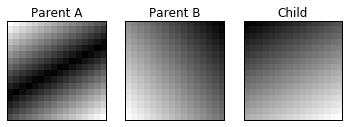

In [198]:
show_crossover()

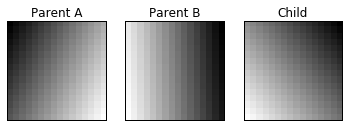

In [199]:
show_crossover()

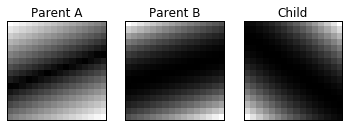

In [200]:
show_crossover()

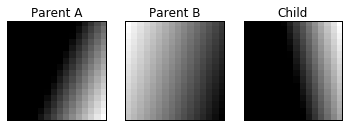

In [201]:
show_crossover()

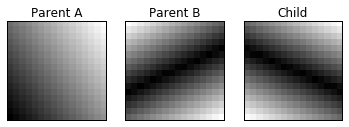

In [202]:
show_crossover()

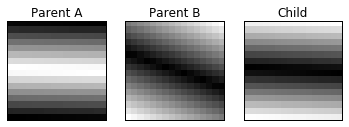

In [203]:
show_crossover()

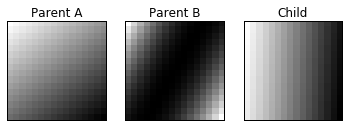

In [204]:
show_crossover()

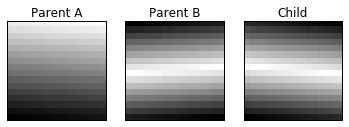

In [205]:
show_crossover()

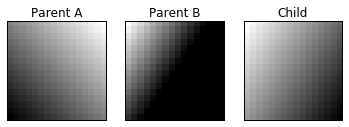

In [213]:
show_crossover()

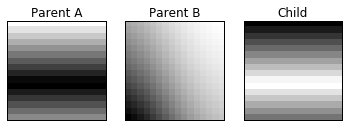

In [212]:
show_crossover(mutations=10)

## Concluding Thoughts

In most of the above examples the child strongly resembles only one of the the two parents. Now I understand why pic breeder only had mutations and not crossover.

I think it is worth pursuing metrics that can be used to evaluate the evolvability of a system independent of specific examples. In this work I had to arbitrarily pick two test cases, a problem agnostic evalaution of evolvable sytems could be very helpful

I propose two:
1. The sharing of conserved phenotypic traits during crossover.
2. Measuing bias by exaustion of the phenotype space during novelty search

A very interesting project would be to evaluate several modelson the above, and then comapre those results to how the systems do on real problems.

** Regarding Genotype To Phenotype Mappings **

It is well accepted that indirect mapping have the ability to scale through the use of modularity, repetition and recursion. However, doing so in a way that does not bias search, allows a large dynamic range of mutations and conserve traits through crossover is still not obtained to my knowledge. 



TODO:
* keep working on other indirect / direct mapping hybrid ideas.
* read the hyperneat papers
* read "On the Performance of Indirect Encoding Across the Continuum of Regularity"
* read "A Taxonomy for Artificial Embryogeny"
